In [1]:
import numpy as np
from navigation import *

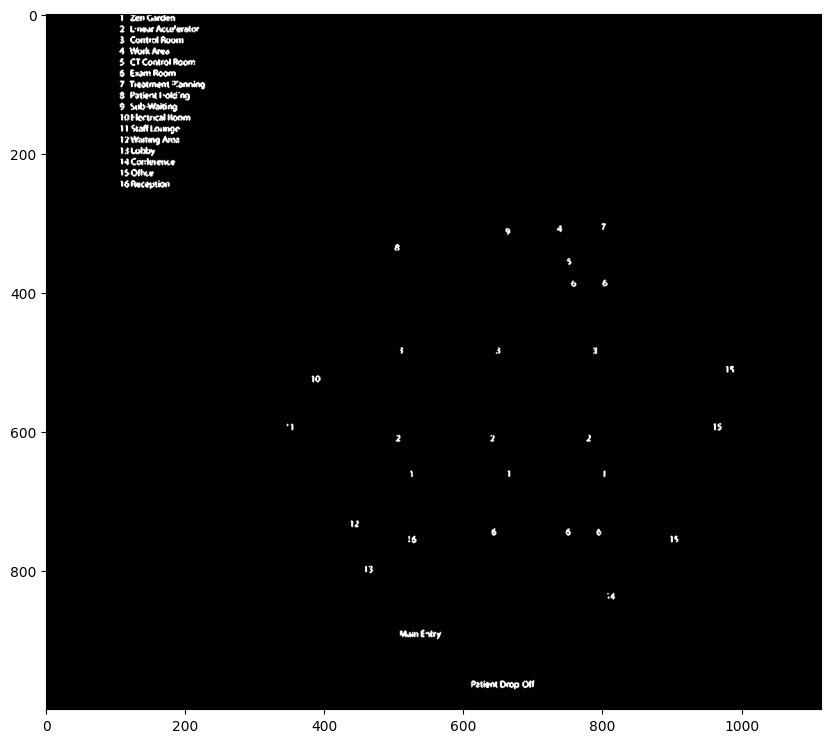

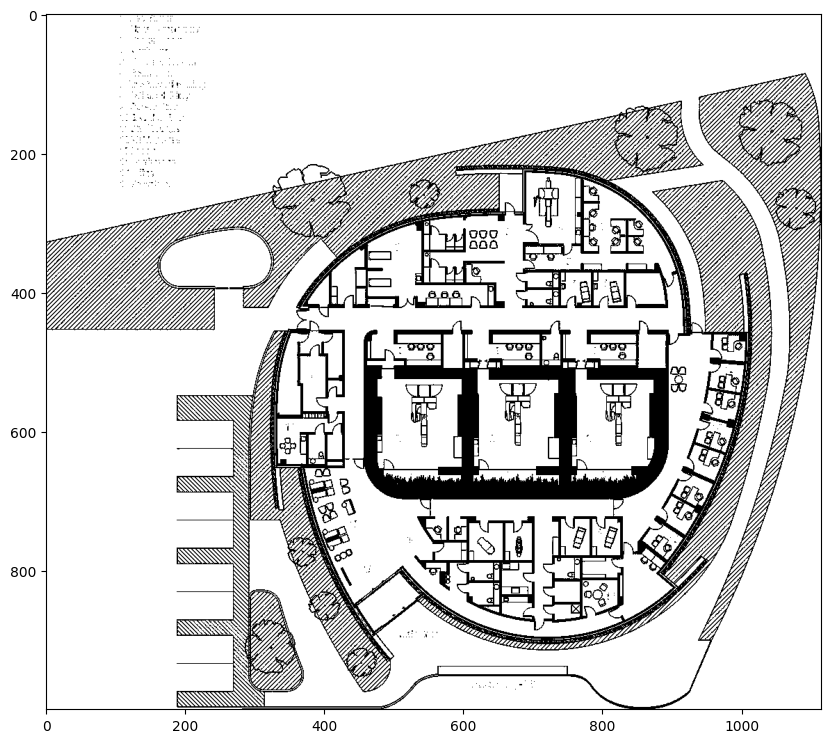

(1000, 1115) (1000, 1115)


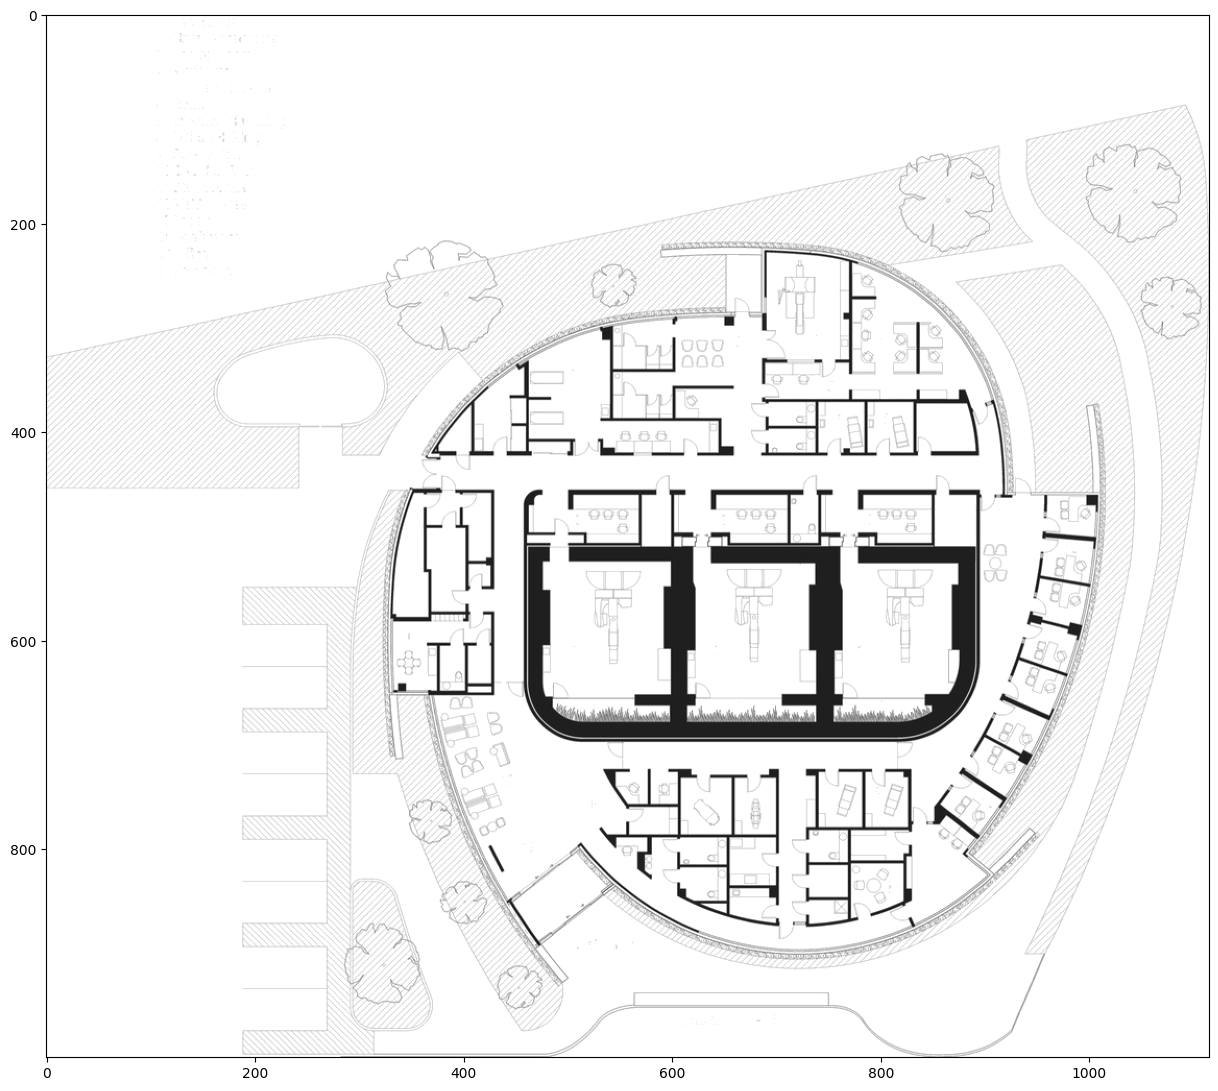

In [2]:
# plot image 'hospital_1.jpg'
image = cv2.imread('assets/images/hospital_1.jpg')
# keep colors with low saturation
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.split(image_hsv)[1]
# apply threshold
filters = [threshold(150, 255),
           morph_dilate(kernel(3)),
           ]

mask = apply_filters(mask, filters)
# original image to gray
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# plot mask
figure = plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')
plt.show()

# apply mask
image = cv2.bitwise_or(image, mask)

# filters = [threshold(80, 255, 'tozero'),
#               ]
# image = apply_filters(image, filters)


center = 125
width = 200
filters = [in_range(0, 242),
           #in_range(center-width/2, center+width/2),
           invert,
           #morph_open(kernel(3)),
           ]
mask = apply_filters(image, filters)

# plot mask
figure = plt.figure(figsize=(10, 10))
plt.imshow(mask, cmap='gray')
plt.show()

# image to rgb
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)


# make mask orange and apply to the image
zero_channel = np.ones_like(mask)*255
mask_color = cv2.merge((mask, mask, zero_channel))
mask_rgb = cv2.merge((mask, mask, mask))

image_rgb = cv2.bitwise_and(image_rgb, mask_rgb)

print(image.shape, mask.shape)

image = cv2.bitwise_or(image, mask)

# plot image
figure = plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray')
plt.show()

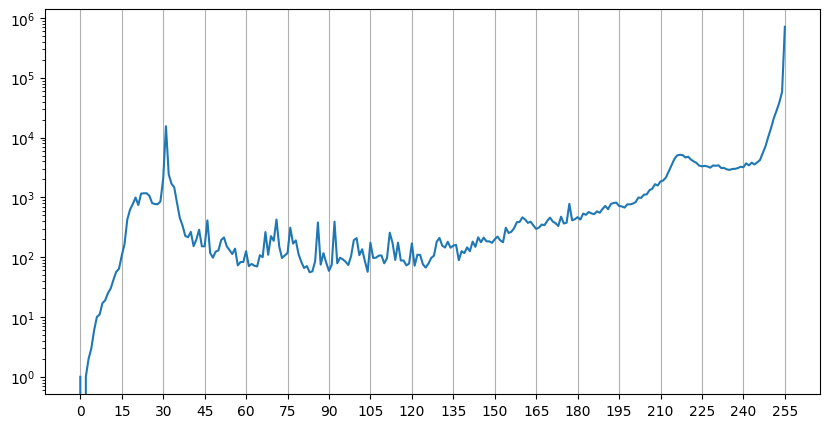

(1000, 1115) (1000, 1115)


True

In [3]:
# plot image 'hospital_1.jpg'
image = cv2.imread('assets/images/hospital_1.jpg')
# keep colors with low saturation
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
mask = cv2.split(image_hsv)[1]
# apply threshold
filters = [threshold(150, 255),
           morph_dilate(kernel(3)),
           ]

mask = apply_filters(mask, filters)
# original image to gray
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# plot mask
# plt.imshow(mask, cmap='gray')
# plt.show()

# create a histogram of the pixels
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# set figure size
plt.figure(figsize=(10, 5))
# plot the histogram
plt.plot(hist)
# x ticks
plt.xticks(np.arange(0, 256, 15))
# grid on x axis
plt.grid(axis='x')
# log scale
plt.yscale('log')
plt.show()

# apply mask
image = cv2.bitwise_or(image, mask)

# filters = [threshold(80, 255, 'tozero'),
#               ]
# image = apply_filters(image, filters)


center = 125
width = 200
filters = [in_range(0, 242),
           #in_range(center-width/2, center+width/2),
           invert,
           #morph_open(kernel(3)),
           ]
mask = apply_filters(image, filters)


# image to rgb
image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)


# make mask orange and apply to the image
zero_channel = np.ones_like(mask)*255
mask_color = cv2.merge((mask, mask, zero_channel))
mask_rgb = cv2.merge((mask, mask, mask))

image_rgb = cv2.bitwise_and(image_rgb, mask_rgb)

print(image.shape, mask.shape)

image = cv2.bitwise_or(image, mask)

image_rgb = image_rgb + mask_color

# save the image
cv2.imwrite('assets/images/hospital_1_mask.jpg', image)

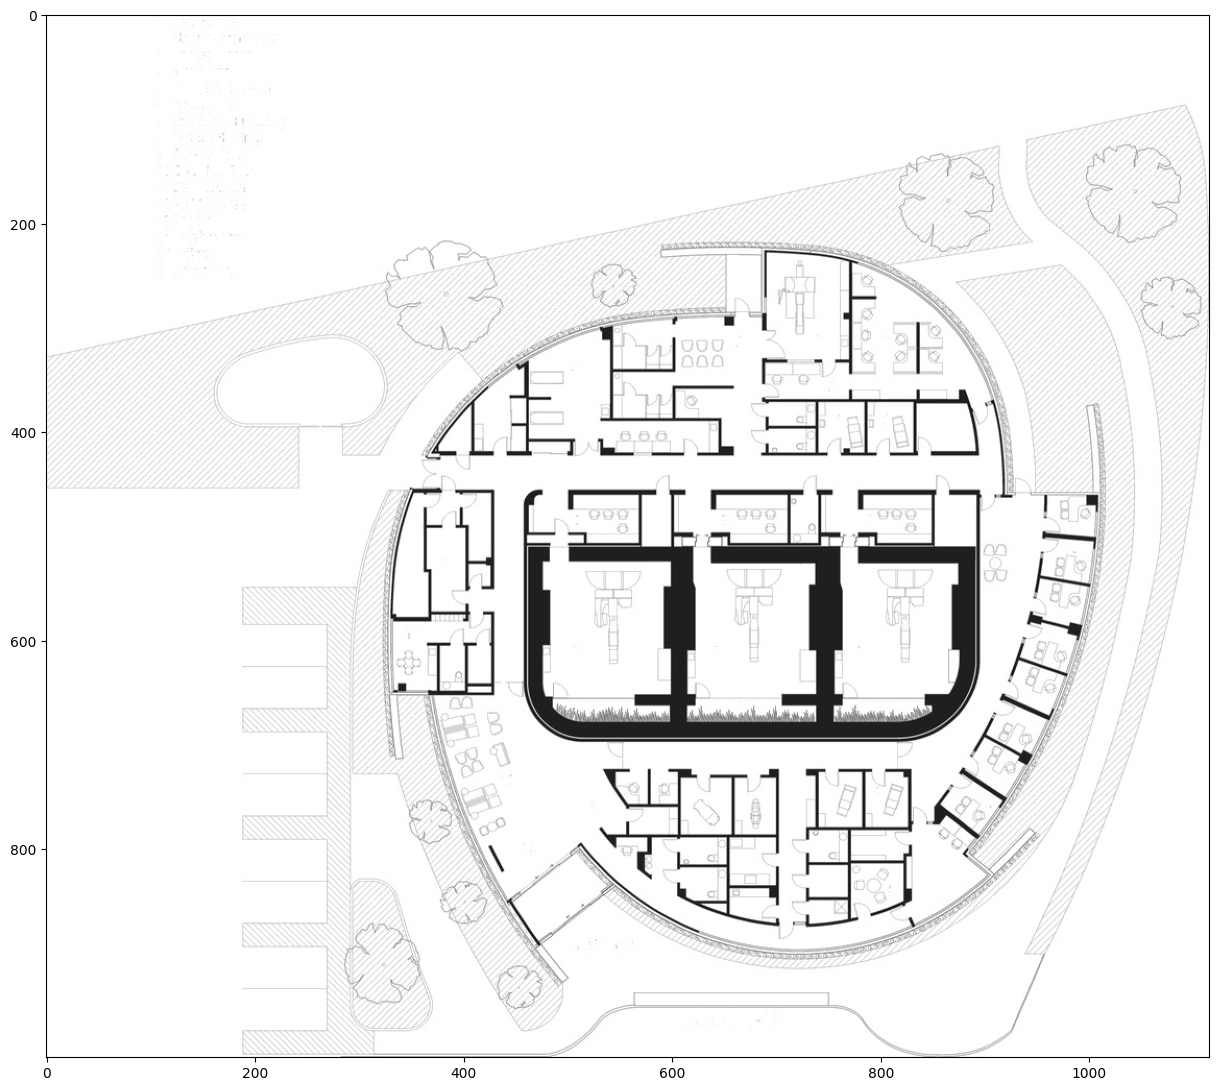

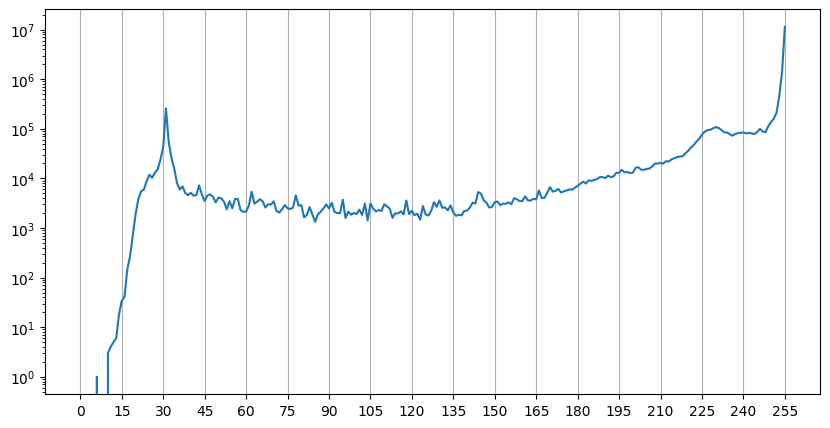

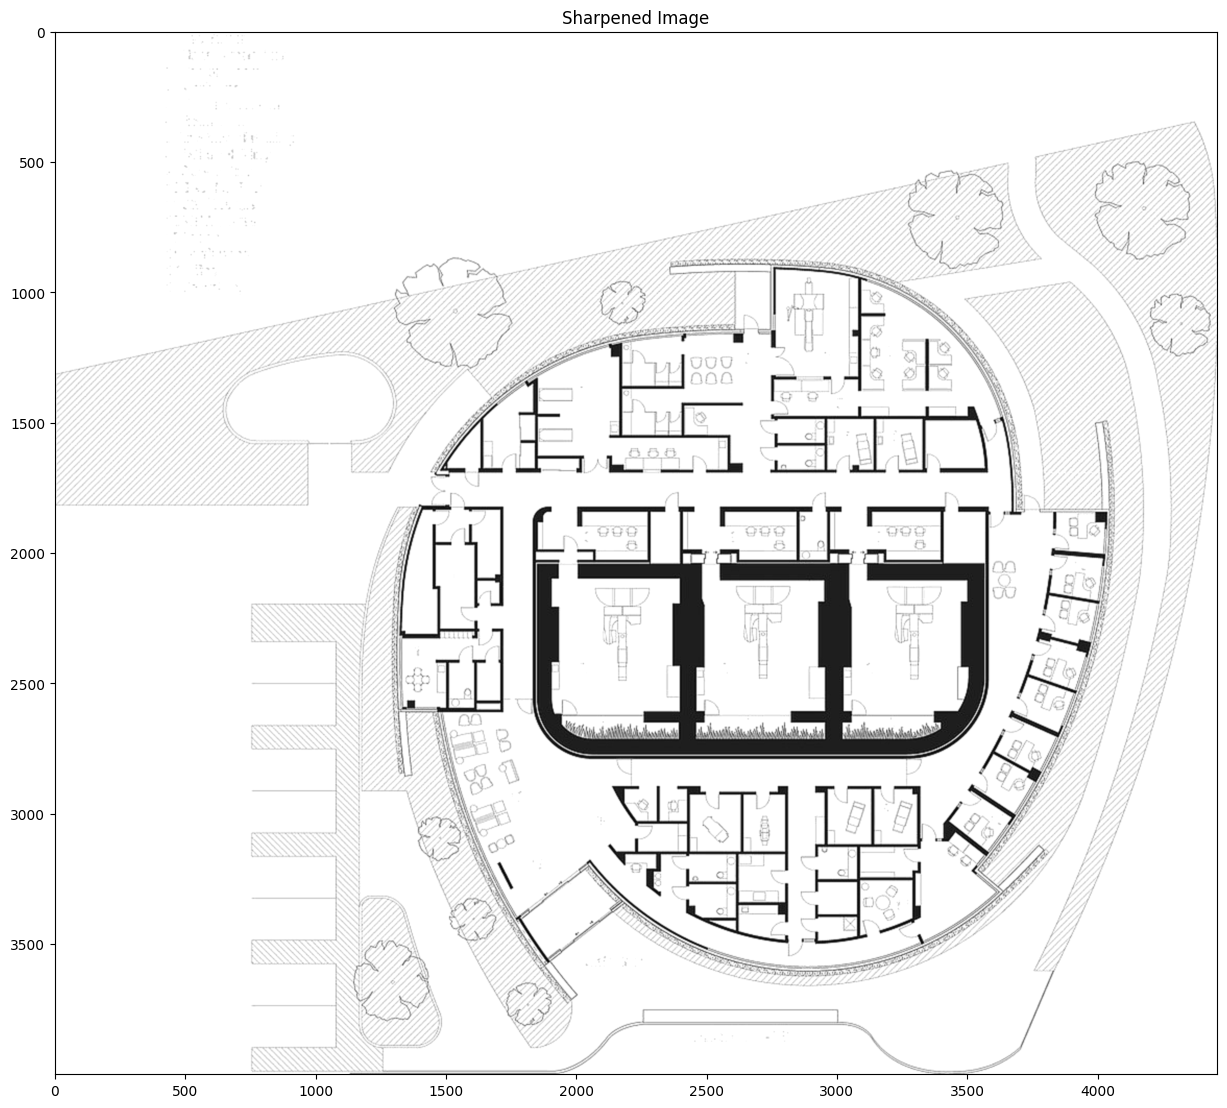

True

In [28]:
image = cv2.imread('assets/images/hospital_1_mask.jpg')

# plot image
figure = plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray')
plt.show()

# original image to gray
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# upscale the image x4
image = cv2.resize(image, (0, 0), fx=4, fy=4)

# create a histogram of the pixels
hist = cv2.calcHist([image], [0], None, [256], [0, 256])

# smooth the histogram
# hist = cv2.GaussianBlur(hist, (17,17), 0)

# find the total min index
min_index = np.argmin(hist)

# set figure size
plt.figure(figsize=(10, 5))
# plot the histogram
plt.plot(hist)
# x ticks
plt.xticks(np.arange(0, 256, 15))
# grid on x axis
plt.grid(axis='x')
# log scale
plt.yscale('log')
plt.show()

# save the image
# cv2.imwrite('assets/images/hospital_1_mask_upscaled.jpg', image)

import cv2
import numpy as np
import matplotlib.pyplot as plt


# sharpening_kernel = np.array(
#     [[0, -1, 0],
#     [-1, 5, -1],
#     [0, -1, 0]]
#  )

sharpened_kernel = np.array(
    [[-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]]
 )

# sharpening_kernel = np.array(
#     [[-1, -1, -1, -1, -1],
#     [-1, 2, 2, 2, -1],
#     [-1, 2, 8, 2, -1],
#     [-1, 2, 2, 2, -1],
#     [-1, -1, -1, -1, -1]]
#     )

# sharpening_kernel = np.array(
#     [[-1, -1, -1, -1, -1],
#     [-1, -1, -1, -1, -1],
#     [-1, -1, 25, -1, -1],
#     [-1, -1, -1, -1, -1],
#     [-1, -1, -1, -1, -1]]
#     )

# sharpening_kernel = np.array(
#     [[0, 0, -1, 0, 0],
#     [0, -1, -1, -1, 0],
#     [-1, -1, 13, -1, -1],
#     [0, -1, -1, -1, 0],
#     [0, 0, -1, 0, 0]]
#     )

sharpening_kernel = np.array(
    [[0, 0, -1, 0, 0],
    [0, -1, -2, -1, 0],
    [-1, -2, 17, -2, -1],
    [0, -1, -2, -1, 0],
    [0, 0, -1, 0, 0]]
    )

# Apply the sharpening filter
sharpened_image = cv2.filter2D(image, -1, sharpening_kernel)
# sharpened_image = cv2.filter2D(sharpened_image, -1, sharpening_kernel)

# keep in range
filters = [
    invert,
    threshold(30, 255, 'tozero'),
    invert,
    gaussian_blur((5,5),3),
    ]
sharpened_image = apply_filters(sharpened_image, filters)


# Display the images
plt.figure(figsize=(15, 15))
plt.title("Sharpened Image")
plt.imshow(sharpened_image, cmap='gray')
plt.show()

# save the image
cv2.imwrite('assets/images/hospital_1_upscaled_sharpened.jpg', sharpened_image)

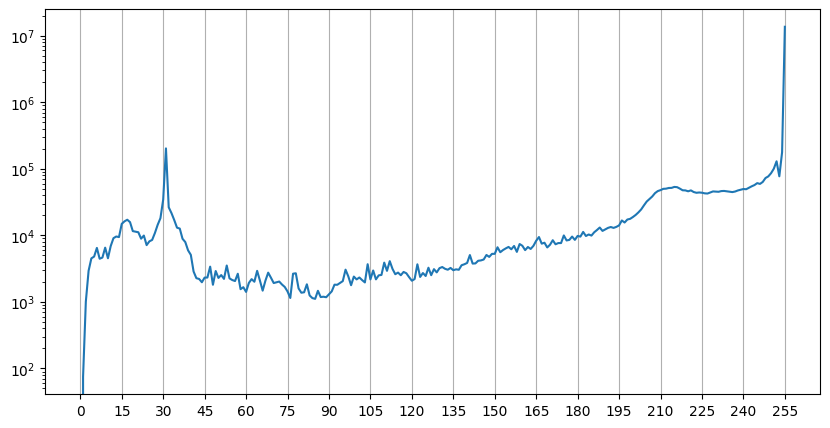

In [23]:
# create a histogram of the pixels
hist = cv2.calcHist([sharpened_image], [0], None, [256], [0, 256])

# smooth the histogram
# hist = cv2.GaussianBlur(hist, (17,17), 0)

# find the total min index
min_index = np.argmin(hist)

# set figure size
plt.figure(figsize=(10, 5))
# plot the histogram
plt.plot(hist)
# x ticks
plt.xticks(np.arange(0, 256, 15))
# grid on x axis
plt.grid(axis='x')
# log scale
plt.yscale('log')
plt.show()

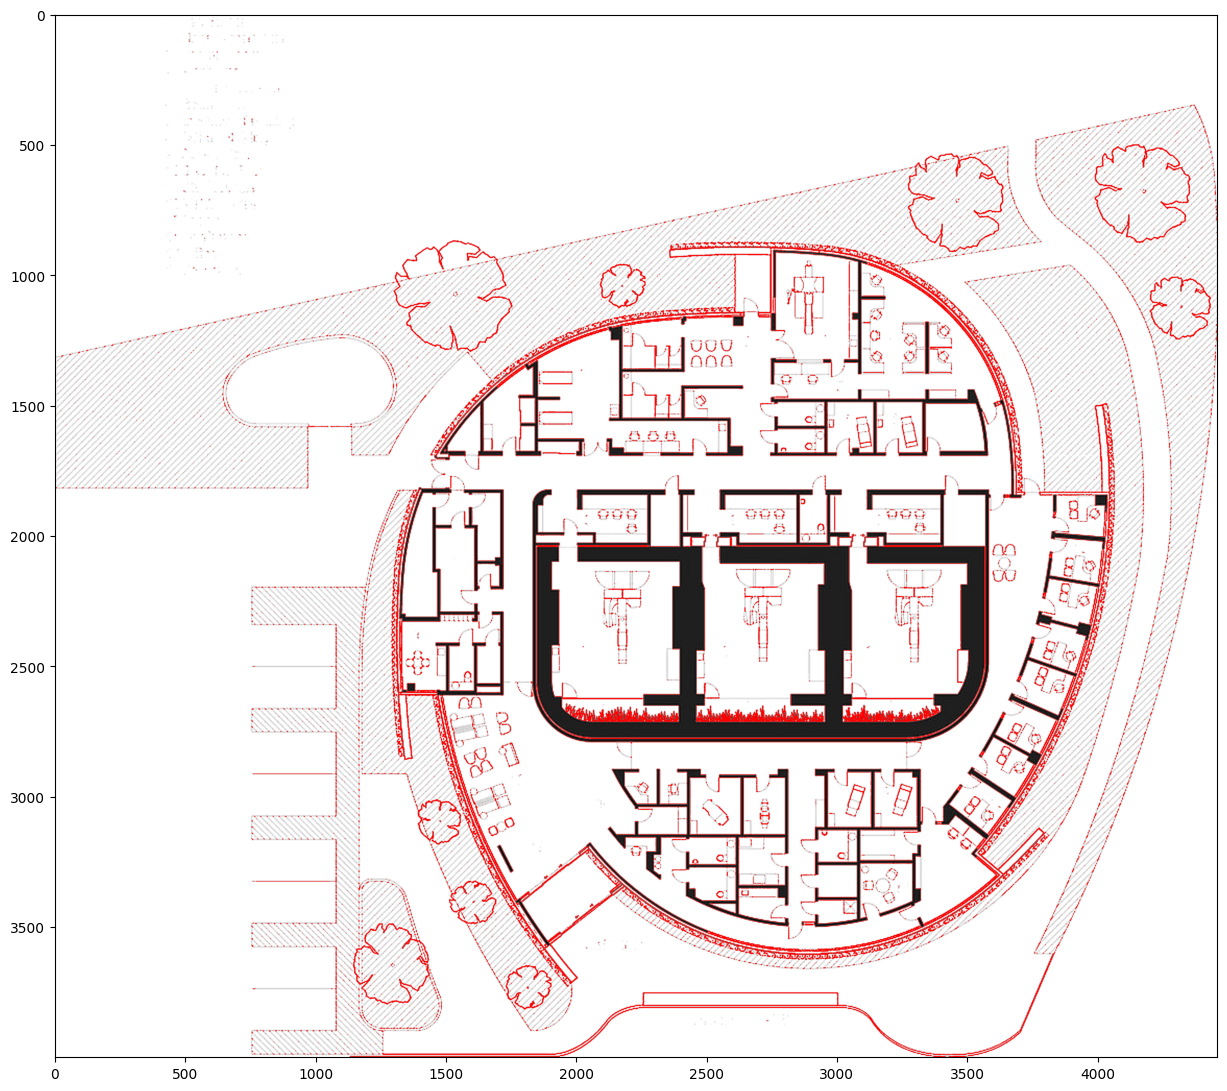

In [25]:
def highlight_range(image, min, max):
    # gray to hsv
    bgr = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    hsv = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)

    in_range = cv2.inRange(image, min, max)
    
    # hue = 0 (red)
    hsv[..., 0] = 0

    # perform bitwise or
    hsv[..., 1] = cv2.bitwise_or(hsv[..., 1], in_range)
    hsv[..., 2] = cv2.bitwise_or(hsv[..., 2], in_range)

    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    rgb = cv2.cvtColor(bgr, cv2.COLOR_BGR2RGB)
    
    return rgb

high_image = highlight_range(sharpened_image, 120, 200)

# plot image
figure = plt.figure(figsize=(15, 15))
plt.imshow(high_image)
plt.show()

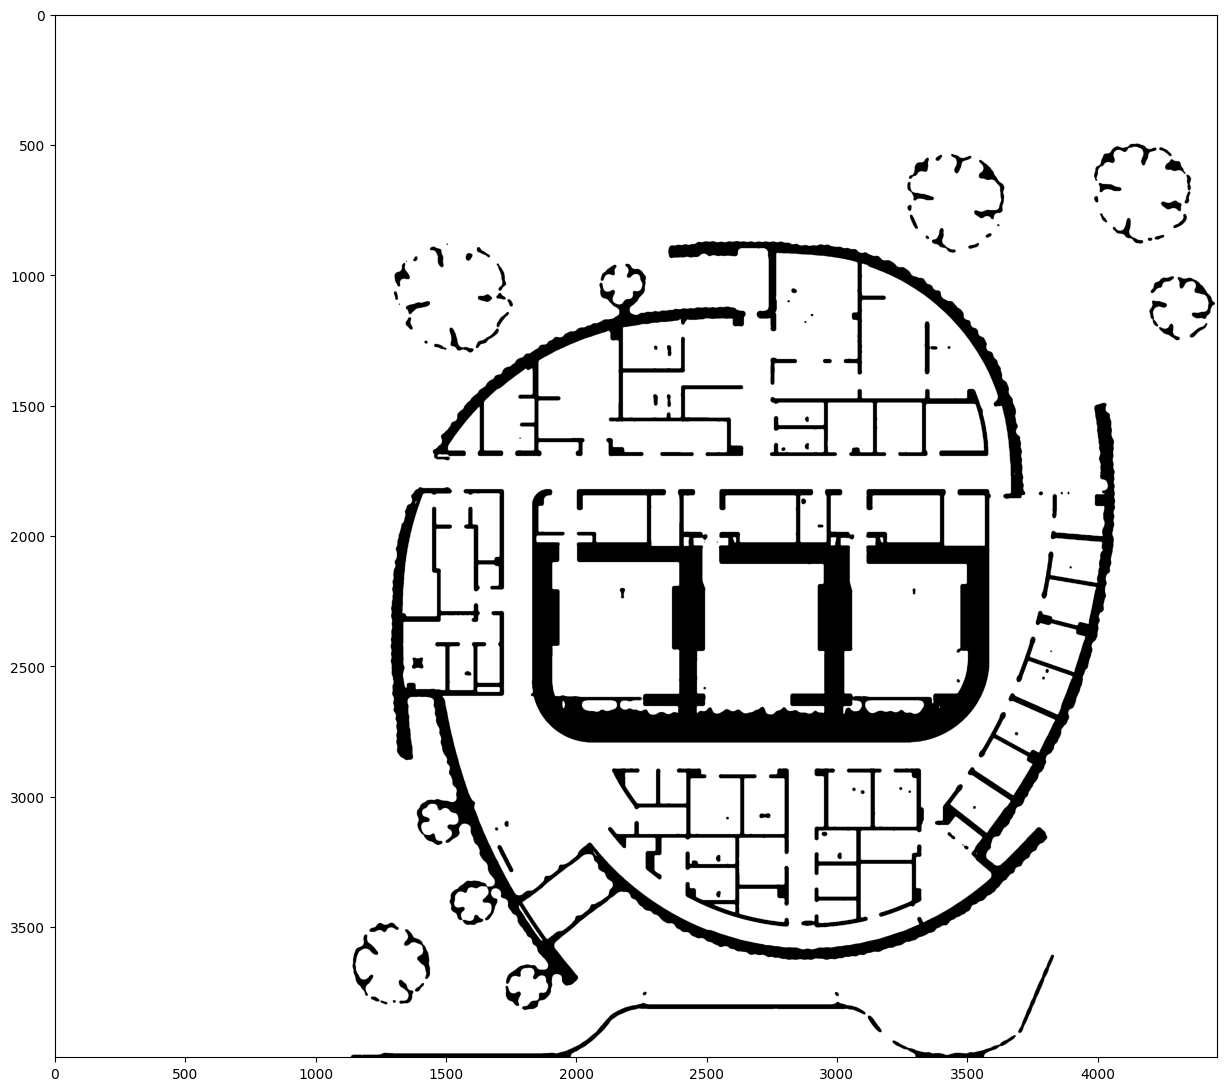

In [140]:
image = cv2.imread('assets/images/hospital_1_upscaled_sharpened.jpg')

# to gray
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# detect walls
filters = [
        threshold(100, 255),
        ]
walls_1 = apply_filters(image, filters)

# detect walls
filters = [
        in_range(120, 190),
        invert,
        gaussian_blur((21, 21), 6),
        threshold(180, 255),
        morph_open(kernel(41)),
        ]
walls_2 = apply_filters(image, filters)

# mask OR image
walls = cv2.bitwise_and(walls_1, walls_2)

filters = [
        gaussian_blur((13, 13), 6),
        threshold(200, 255),
        ]
walls = apply_filters(walls, filters)

# plot image
figure = plt.figure(figsize=(15, 15))
plt.imshow(walls, cmap='gray')
plt.show()

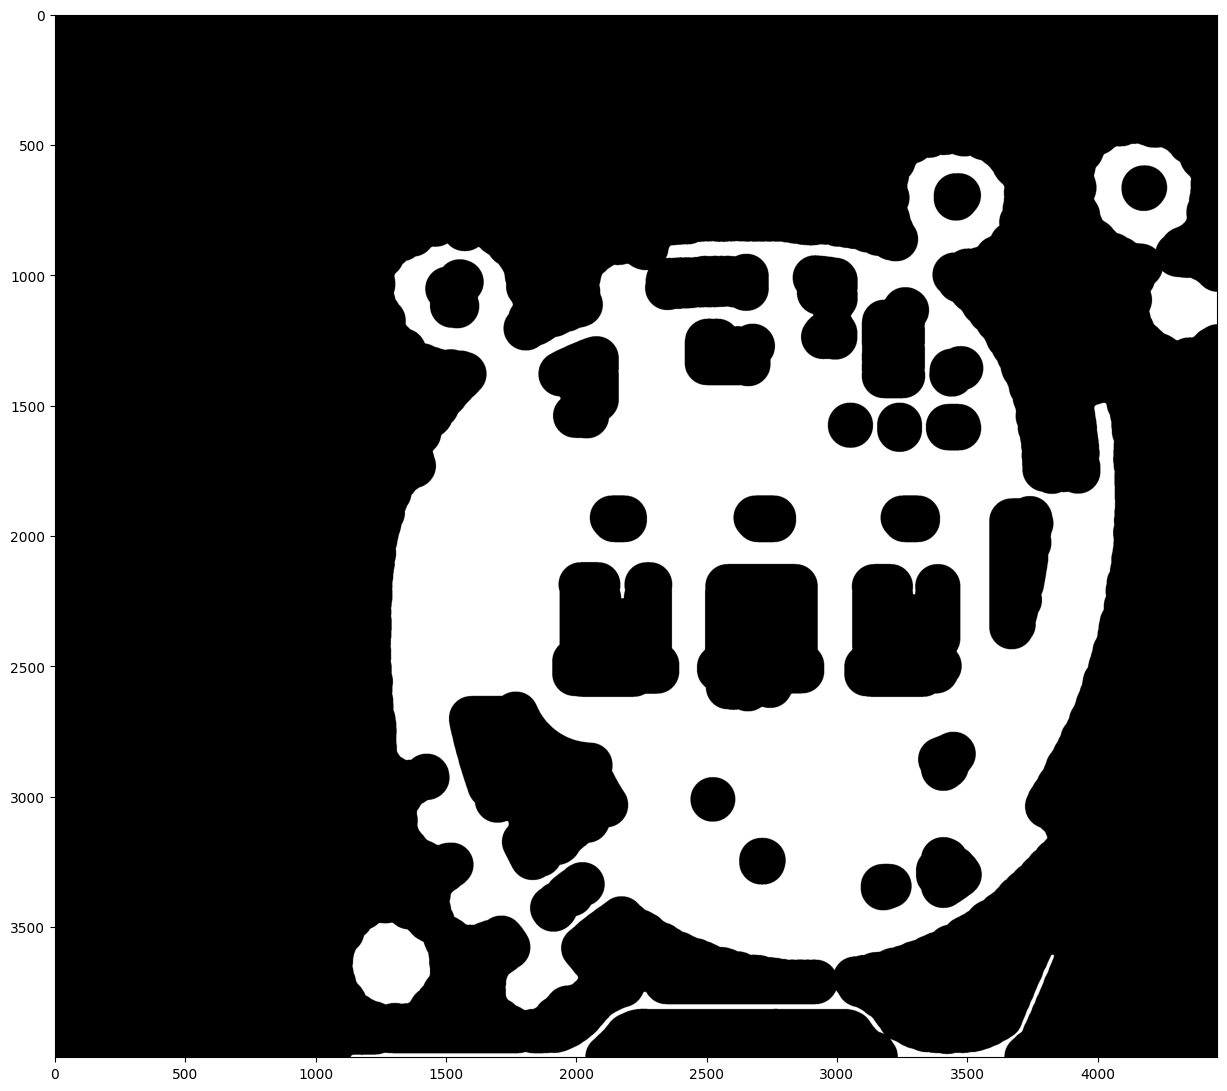

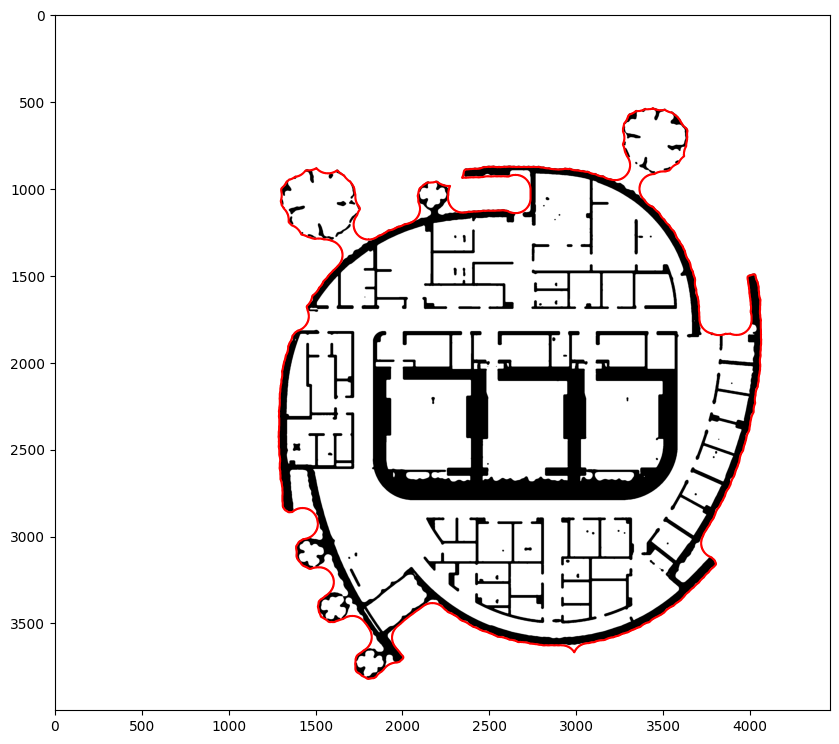

In [ ]:
filters = [
        morph_open(kernel(171)),
        invert
        ]
mask = apply_filters(walls, filters)

# find contours
contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# keep the contour with the largest area
building = max(contours, key=cv2.contourArea)

# create a mask with the building
mask = np.zeros_like(mask)
cv2.drawContours(mask, [building], -1, 255, -1)

filters = [
    invert
]
mask = apply_filters(mask, filters)

walls = cv2.bitwise_or(walls, mask)

# plot the mask
plt.figure(figsize=(10, 10))
plt.imshow(walls, cmap='gray')
# plot the building
plt.plot(building[:, 0, 0], building[:, 0, 1], color='red')
plt.show()

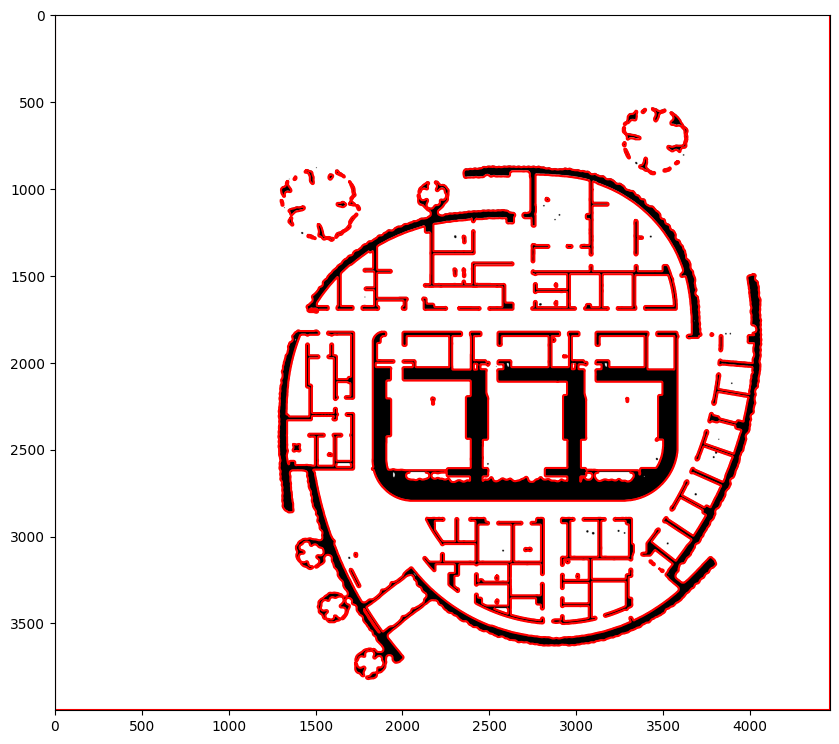

In [155]:
walls_contour, _ = cv2.findContours(walls, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# reject small contours
walls_contour = [contour for contour in walls_contour if cv2.contourArea(contour) > 200]

# plot the contours of the walls
plt.figure(figsize=(10, 10))
plt.imshow(walls, cmap='gray')
for contour in walls_contour:
    plt.plot(contour[:, 0, 0], contour[:, 0, 1], color='red')
plt.show()

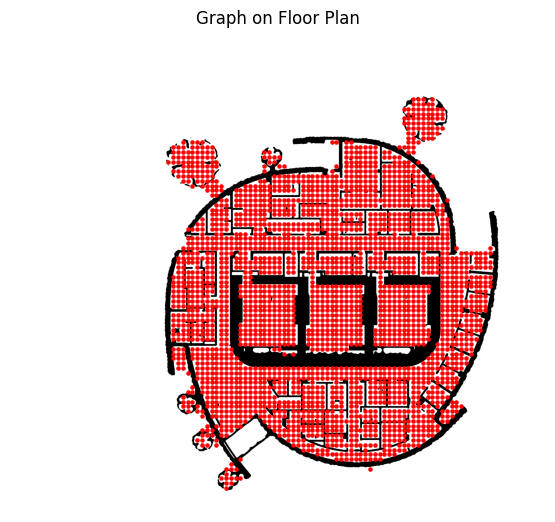

In [156]:
grid_size = 40

# Create a grid
grid = np.zeros_like(walls)
for i in range(grid_size, walls.shape[1], grid_size):
    cv2.line(grid, (i, 0), (i, walls.shape[0]), 255, 1)
for i in range(grid_size, walls.shape[0], grid_size):
    cv2.line(grid, (0, i), (walls.shape[1], i), 255, 1)

# Create nodes at the center of each grid cell
nodes = []
for i in range(grid_size, walls.shape[1], grid_size):
    for j in range(grid_size, walls.shape[0], grid_size):
        nodes.append((i, j))

open_walls = []
closed_walls = []

# Reject nodes that are on walls
for contour in walls_contour:
    valid_nodes = [node for node in nodes if cv2.pointPolygonTest(contour, (node[0], node[1]), False) < 0]
    if len(valid_nodes) < 0.1*len(nodes):
        nodes = [node for node in nodes if cv2.pointPolygonTest(contour, (node[0], node[1]), False) > 0]
        closed_walls.append(contour)
    else:
        nodes = valid_nodes
        open_walls.append(contour)

# Reject nodes that are outside of building
nodes = [node for node in nodes if cv2.pointPolygonTest(building, (node[0], node[1]), False) >= 0]

valid_nodes = nodes

# Create a graph
G = nx.Graph()
for i, node in enumerate(nodes):
    G.add_node(i, pos=node)


# Draw the graph on the image
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_color='red', with_labels=False, node_size=5)
plt.imshow(walls, cmap='gray')
plt.title('Graph on Floor Plan')
plt.show()

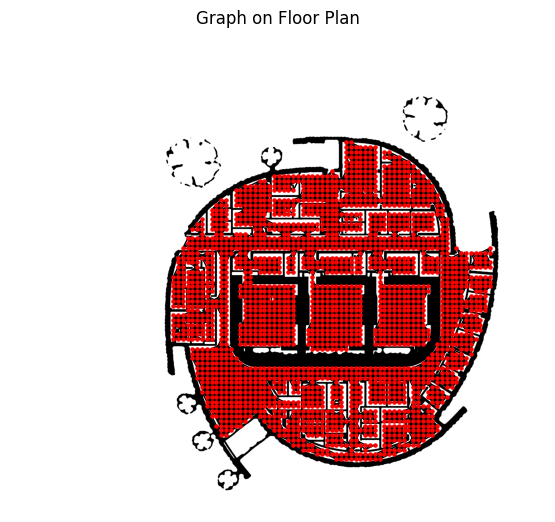

In [157]:
radius = 2.3

# Add nodes to the graph and create spatial index
idx = index.Index()
positions = {}
for i, node in enumerate(valid_nodes):
    G.add_node(i)
    positions[i] = node
    idx.insert(i, (node[0], node[1], node[0], node[1]))

# Convert contours to Shapely Polygons for efficient intersection checks
# self.obstacles = [Polygon(c.squeeze()) for c in self.obstacles]

walls_contour = [Polygon(contour.squeeze()) for contour in walls_contour]
open_walls = [Polygon(contour.squeeze()) for contour in open_walls]
closed_walls = [Polygon(contour.squeeze()) for contour in closed_walls]

# self.rooms = [Polygon(c.squeeze()) for c in self.rooms]

# Connect nodes if close enough and no intersection with contours
for i, pos_i in positions.items():
    nearby_nodes = list(idx.nearest((pos_i[0], pos_i[1], pos_i[0], pos_i[1]), 50))  # Adjust the number based on needed proximity
    # Calculate distances once and store them in a dictionary
    distances_dict = {x: np.linalg.norm(np.array(pos_i) - np.array(positions[x])) for x in nearby_nodes}
    # Sort nearby_nodes based on the precomputed distances
    nearby_nodes = sorted(nearby_nodes, key=lambda x: distances_dict[x])
    # filter out nodes that are too far
    nearby_nodes = [x for x in nearby_nodes if distances_dict[x] <= grid_size * radius]
    for j in nearby_nodes:
        if i >= j:
            continue
        pos_j = positions[j]
        vector = np.array(pos_j) - np.array(pos_i)
        vector //= grid_size
        # gcd of the vector components is 1, add the edge
        if np.gcd(vector[0], vector[1]) != 1:
            continue

        line = LineString([pos_i, pos_j])
        if not does_line_intersect_contour(line, open_walls):
            G.add_edge(i, j, weight=distances_dict[j])

# Isolate the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G = G.subgraph(largest_cc).copy()

# Get the new valid nodes
graph_nodes = [positions[i] for i in G.nodes]

# Create a mapping from the original node labels to new labels
mapping = {old_label: new_label for new_label, old_label in enumerate(G.nodes())}

G = nx.relabel_nodes(G, mapping)


# Draw the graph on the image
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, node_color='red', with_labels=False, node_size=5)
plt.imshow(walls, cmap='gray')
plt.title('Graph on Floor Plan')
plt.show()

In [158]:
def get_path(start, end, algorithm='dijkstra', in_pixels=False):
    image_shape = walls.shape

    print(int(start[1] * image_shape[0]))

    if not in_pixels:
        start = (int(start[0] * image_shape[1]), int(start[1] * image_shape[0]))
        end = (int(end[0] * image_shape[1]), int(end[1] * image_shape[0]))

    # Find the nearest nodes to the start and end points
    start_node = min(graph_nodes, key=lambda x: np.sqrt((x[0] - start[0])**2 + (x[1] - start[1])**2))
    end_node = min(graph_nodes, key=lambda x: np.sqrt((x[0] - end[0])**2 + (x[1] - end[1])**2))

    # Find the shortest path
    if algorithm == 'dijkstra':
        path = nx.shortest_path(G, source=graph_nodes.index(start_node), target=graph_nodes.index(end_node), weight='weight')
    elif algorithm == 'astar':
        # Heuristic function for A* (Euclidean distance)
        def heuristic(node1: Tuple[int, int], node2: Tuple[int, int]) -> float:
            x1, y1 = G.nodes[node1]['pos']
            x2, y2 = G.nodes[node2]['pos']
            return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

        # Find the shortest path using A* algorithm
        path = nx.astar_path(G, source=graph_nodes.index(start_node), target=graph_nodes.index(end_node), heuristic=heuristic, weight='weight')
    else:
        raise ValueError('Invalid algorithm. Choose either "dijkstra" or "astar"')

    # Calculate the total weight of the path
    distance = sum(G[u][v]['weight'] for u, v in zip(path, path[1:]))

    path_points = [graph_nodes[i] for i in path]

    # add starting and ending nodes to the path
    if in_pixels:
        start_point = start
        end_point = end
    else:
        start_point = (start[0] / image_shape[1], start[1] / image_shape[0])
        end_point = (end[0] / image_shape[1], end[1] / image_shape[0])

    # Check if start and end points can be connected directly to the path
    start_line = LineString([start_point, path_points[0]])
    end_line = LineString([end_point, path_points[-1]])
    if not does_line_intersect_contour(start_line, open_walls):
        path_points.insert(0, start_point)
    if not does_line_intersect_contour(end_line, open_walls):
        path_points.append(end_point)


    # Calculate the total distance of the path in meters by summing the the euclidean distances between the points
    distance = sum([np.linalg.norm(np.array(i) - np.array(j)) for i, j in zip(path_points, path_points[1:])])

    return path_points, distance

3200


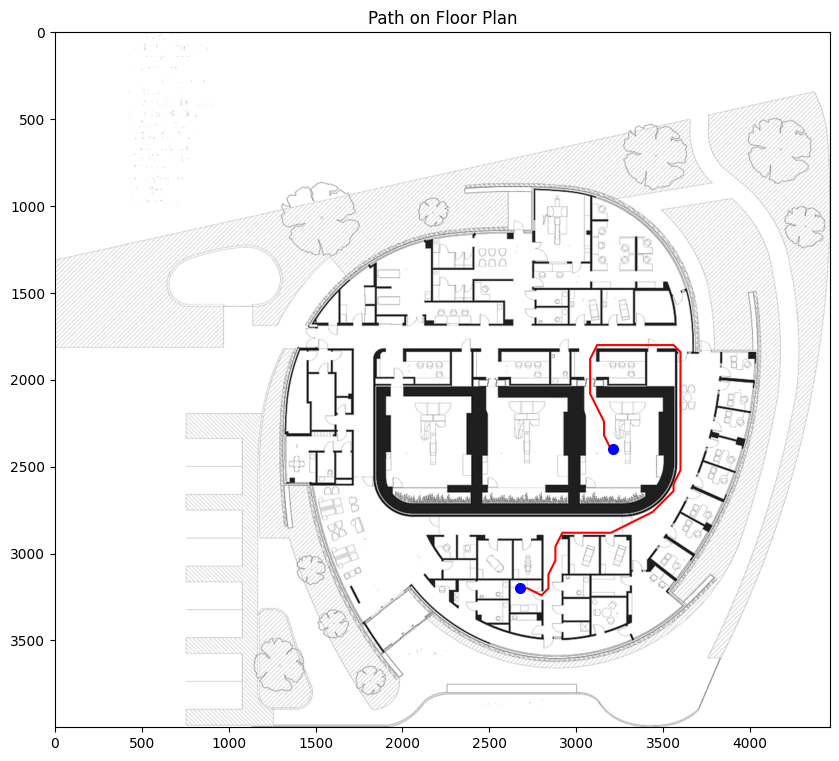

In [159]:
start = (0.6, 0.8)
end = (0.72, 0.6)
algorithm = 'astar'
in_pixels = False

path_points, distance = get_path(start, end, algorithm, in_pixels)

image_shape = walls.shape

# plot the path
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.plot([x[0] for x in path_points], [x[1] for x in path_points], color='red')
plt.title('Path on Floor Plan')
# plot the start and end points
plt.plot(start[0]*image_shape[1], start[1]*image_shape[0], 'bo', markersize=7)
plt.plot(end[0]*image_shape[1], end[1]*image_shape[0], 'bo', markersize=7)
plt.show()

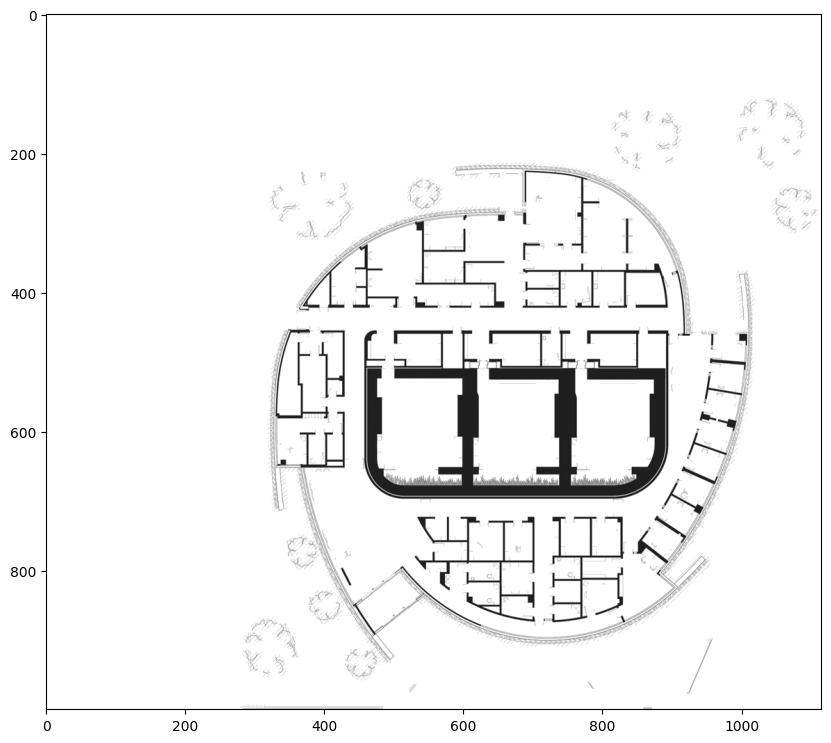

In [221]:
image = cv2.imread('assets/images/hospital_1_mask.jpg')

# original image to gray
image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# detect walls
filters = [
        threshold(180, 255),
        gaussian_blur((3,3), 2),
        threshold(180, 255),
        morph_erode(kernel(10)),
        # gaussian_blur((3,3), 2),
        # threshold(180, 255),
        invert
        ]
mask = apply_filters(image, filters)

image_inv = cv2.bitwise_not(image)

walls_and_doors = cv2.bitwise_and(image_inv, mask)

walls_and_doors = cv2.bitwise_not(walls_and_doors)

# plt.figure(figsize=(10, 10))
# plt.imshow(walls_and_doors, cmap='gray')
# plt.show()

filters = [
        # in_range(0, 200),
        # adaptive_threshold(201, 51),
        # morph_open(kernel(3)),
        # threshold(180, 255),
        # morph_open(kernel(30)),
]

walls_and_doors = apply_filters(walls_and_doors, filters)

# plt.figure(figsize=(10, 10))
# plt.imshow(image, cmap='gray')
# plt.show()

plt.figure(figsize=(10, 10))
plt.imshow(walls_and_doors, cmap='gray')
plt.show()

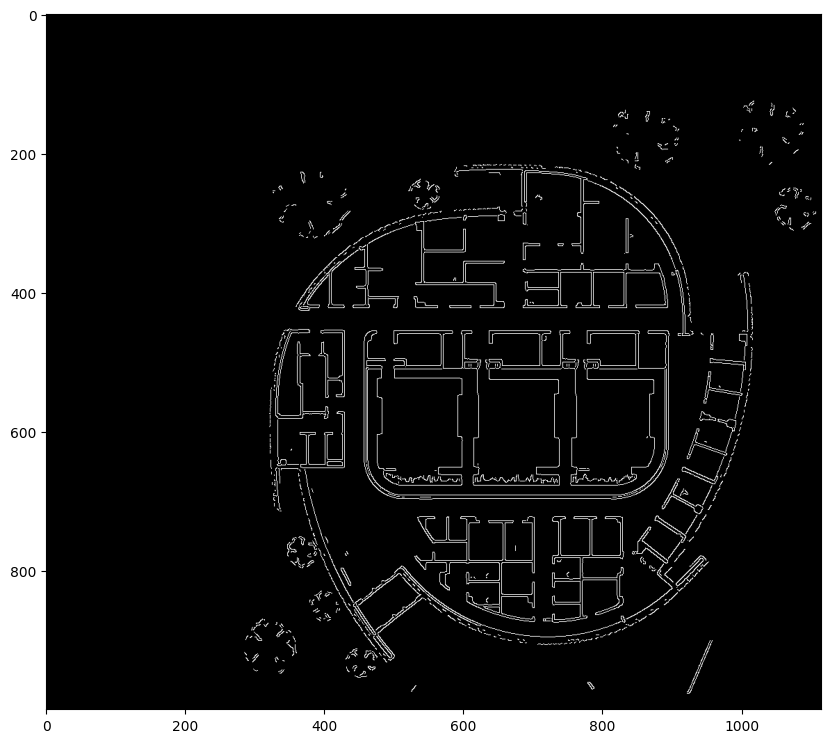

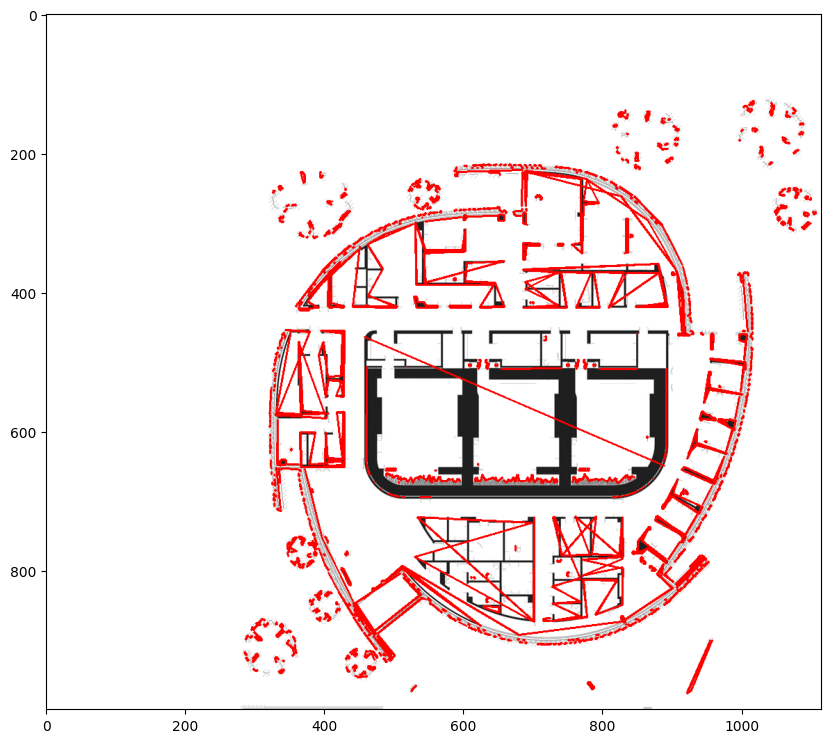

In [229]:
import cv2
import numpy as np

# Load the image
image = walls_and_doors
gray = walls_and_doors

# image to rgb
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Apply Gaussian Blur to reduce noise
blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Edge Detection
edges = cv2.Canny(blurred, 120, 150)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(edges, cmap='gray')
plt.show()

# Detecting Straight Lines using Hough Transform
lines = cv2.HoughLinesP(edges, rho=1, theta=np.pi/180, threshold=100, minLineLength=50, maxLineGap=10)

# if lines is not None:
#     for line in lines:
#         x1, y1, x2, y2 = line[0]
#         cv2.line(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Detecting Curved Lines using Contours
contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

for contour in contours:
    approx = cv2.approxPolyDP(contour, 0.02 * cv2.arcLength(contour, True), True)
    cv2.drawContours(image, [approx], 0, (255, 0, 0), 2)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(image, cmap='gray')
plt.show()

Number of rooms: 48


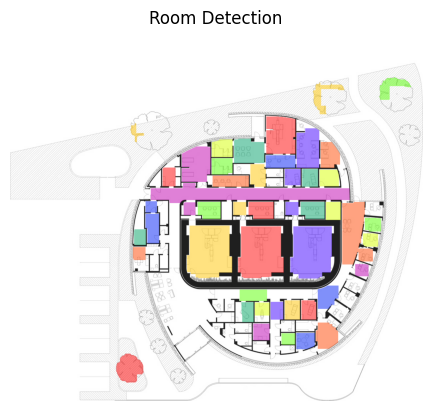

In [130]:
contours, _ = cv2.findContours(walls_and_doors, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
building = contours[0]
rooms = contours #[1:]

# reject small contours
rooms = [room for room in rooms if cv2.contourArea(room) > 500]
rooms = [room for room in rooms if cv2.contourArea(room) < 100000]

print('Number of rooms:', len(rooms))

"""A function that plots the rooms on the floor plan"""
# Create an image to draw the colored contours
contour_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)

# Get a colormap
colormap = plt.get_cmap('prism', len(rooms))

# Draw each contour with a different color and fill the inside
for i, contour in enumerate(rooms):
    color = tuple(int(c * 255) for c in colormap(i)[:3])  # Convert colormap color to BGR
    cv2.drawContours(contour_image, [contour], -1, color, thickness=cv2.FILLED)

# Convert the original image to RGB
original_image_rgb = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

# Create a mask where the contours are drawn
mask = np.zeros_like(contour_image, dtype=np.uint8)
for i, contour in enumerate(rooms):
    color = (255, 255, 255)  # White color for the mask
    cv2.drawContours(mask, [contour], -1, color, thickness=cv2.FILLED)

# Blend the contour image with the original image using the mask
alpha = 0.5  # Transparency factor
blended_image = cv2.addWeighted(original_image_rgb, 1 - alpha, contour_image, alpha, 0)

# Plot the blended image
plt.imshow(blended_image)
plt.title('Room Detection')
plt.axis('off')  # Hide axes for better visualization
plt.show()